In [ ]:
#Import dependencies
!pip install emoji
import requests
import json
import pandas as pd
import emoji
import re
import nltk
nltk.download('punkt')


In [ ]:
#Download english stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords
import numpy as np

Twitter API Set-up

In [ ]:
bearer_token= ''
url = "https://api.twitter.com/2/tweets/search/recent?query="
twitter_params = "youtube%20dislike"
url = url + twitter_params

import tweepy,json
access_token=""
access_token_secret=""
consumer_key=""
consumer_secret=""
auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

Function to remove links, @, usernames and the # in hashtags


In [ ]:
def clean_tweet(tweet):
  stopword = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
  tweet = tweet.lower()
  tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)
  tweet = re.sub('@[^\s]+', 'AT_USER', tweet)
  tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
  tweet = nltk.word_tokenize(tweet)
  word = [word for word in tweet if word not in stopword]
  return " ".join(word)#' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [ ]:
clean_tweet('This is a tweet')

'tweet'

In [ ]:
def evaluate(polarity):
  if polarity >0:
    return 'Positive'
  else:
    return "negative"

In [ ]:
import nltk
a = clean_tweet("greeat @user dsfsf ")
a

'greeat dsfsf'

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob("hate").sentiment.polarity

-0.8

Fetch 2000 tweets from Twitter with the keywords YOUTUBE and DISLIKE

In [ ]:

list2 = []
for tweet in tweepy.Cursor(api.search, q='youtube since:2021-11-10', count = 2000, lang='en', full_text=True).items():
    list2.append(tweet)
    

Fix Date to format YY-MM-DD

In [ ]:
"2021" +list2[0]._json['created_at'][8:10]

Visualize the JSON that is Returned

In [ ]:
list2[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Nov 28 19:36:03 +0000 2021',
 'entities': {'hashtags': [{'indices': [90, 98], 'text': 'YouTube'},
   {'indices': [99, 103], 'text': 'yuh'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1465041821197819920,
 'id_str': '1465041821197819920',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'text': 'I think YouTube removed the dislike button because YouTube rewind 2021 is coming soon… :o #YouTube #yuh',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_a

Make columns for dataframe from the JSON returned

In [ ]:
NameList = []
tweets = []
likes = []
date = []
for i in range(0,2000):
  NameList.append(list2[i]._json['user']['name'])
  tweets.append(emoji.demojize(list2[i]._json['text'], delimiters=("", "")).replace("_", " "))
  likes.append(list2[i]._json['favorite_count'])
  date.append("2021-11-" + list2[i]._json['created_at'][8:10])

Creating a dataframe of the tweets


In [ ]:
d = {
    'Username': NameList,
    'Tweet': tweets,
     'Date': date,
     'Likes': likes,
}
df = pd.DataFrame(data=d)


Drop duplicated of the dataframe

In [ ]:
df = df.drop_duplicates(subset ="Tweet")
df = df.reset_index(drop=True)

,Unnamed: 0,Username,Tweet,Likes
0,0,Avior,I think YouTube removed the dislike button bec...,0
1,1,Will I Ain’t,RT @linusgsebastian: Yes I had the dislike cou...,0
2,2,𝙃𝙊𝙊𝙆𝙎𝙃𝙊𝙏,@YouTube Dislike. Not because of the video,0
3,3,Franco Contreras,@YouTube you fucked up... The dislike count is...,0
4,4,Gully,@YouTube could you higher the position of the ...,0
...,...,...,...,...
2818,2818,benboy,@YouTube @HenrieVIII @misterjjosephs Let's mak...,28
2819,2819,Anthony,@rickyberwick @TeamYouTube I need the dislike ...,3
2820,2820,Virgin,I never really pressed dislike that much but i...,1
2821,2821,john,"Pro 🇪🇹unity YouTube channels like, Hak ena sak...",0


Dataframe

In [ ]:
df

,Username,Tweet,Date,Likes
0,Avior,I think YouTube removed the dislike button bec...,2021-11-28,0
1,Will I Ain’t,RT @linusgsebastian: Yes I had the dislike cou...,2021-11-28,0
2,𝙃𝙊𝙊𝙆𝙎𝙃𝙊𝙏,@YouTube Dislike. Not because of the video,2021-11-28,0
3,Franco Contreras,@YouTube you fucked up... The dislike count is...,2021-11-28,0
4,Gully,@YouTube could you higher the position of the ...,2021-11-28,0
...,...,...,...,...
1058,TWH Hardware,@YouTube Use this comment as a Dislike button!,2021-11-27,3
1059,JASON🦇🕷🏝,@YouTube Can’t wait to see people getting scam...,2021-11-27,2
1060,raskovski,@YouTube Bring back dislike button,2021-11-27,0
1061,LyghtSpeed,@YouTube I think il dislike... oh wait neutral...,2021-11-27,1


In [ ]:
#download the dataframe as a csv file
from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#mount google drive to import files
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
with open('/content/gdrive/MyDrive/tweet1.json') as json_file:
    tweet1JSON = json.load(json_file)

with open('/content/gdrive/MyDrive/tweet2.json') as json_file:
    tweet2JSON = json.load(json_file)

In [ ]:
tweetJSON = tweet1JSON + tweet2JSON

In [ ]:
tweetJSON[0]['created_at']

'2021-11-28T08:25:10.000Z'

In [ ]:
nameList = []
tweets = []
likes = []
tweetDate = []
for i in range(0,2373):
  nameList.append(tweetJSON[i]['user']['name'])
  tweets.append(emoji.demojize(tweetJSON[i]['full_text'], delimiters=("", "")).replace("_", " "))
  likes.append(tweetJSON[i]['favorite_count'])
  tweetDate.append(tweetJSON[i]['created_at'][0:10])

In [ ]:
len(nameList)

2373

In [ ]:
d = {
    'Username': nameList,
    'Tweet': tweets,
     'Date': tweetDate,
     'Likes': likes
}
df2 = pd.DataFrame(data=d)

In [ ]:
df2 = df2.drop_duplicates(subset ="Tweet")
df2 = df2.reset_index(drop=True)
df2

,Username,Tweet,Date,Likes
0,National Cyber Security,YouTube: Bring back dislike counts with these ...,2021-11-28,1
1,Caesar Traianus Hadrianus,@YouTube Dislike and uninstall app,2021-11-28,0
2,Kevin Isaac,I really don't like YouTube's decision to remo...,2021-11-28,1
3,MANDA 🧟‍♀️🦚🍂🔮🎨🐿,@MillieParfait I usually come to see the disli...,2021-11-28,0
4,out of context hooman,the irony - a platform like twitter needs a di...,2021-11-28,0
...,...,...,...,...
2103,benboy,@YouTube @HenrieVIII @misterjjosephs Let's mak...,2021-11-21,28
2104,Anthony,@rickyberwick @TeamYouTube I need the dislike ...,2021-11-22,3
2105,Virgin,I never really pressed dislike that much but i...,2021-11-22,1
2106,john,"Pro Ethiopiaunity YouTube channels like, Hak e...",2021-11-23,0


**Final Tweets made AFTER youtube announced they removed the dislike button**

In [ ]:

finalDF = pd.concat([df, df2])

In [ ]:
finalDF=pd.read_csv('gdrive/MyDrive/finalDF.csv')
finalDF

,Unnamed: 0,Username,Tweet,Likes
0,0,Avior,I think YouTube removed the dislike button because YouTube rewind 2021 is coming soon… :o #YouTube #yuh,0
1,1,Will I Ain’t,RT @linusgsebastian: Yes I had the dislike counter meeting with YouTube.\n\nZero ducks were given about my concerns or the ones shared by our…,0
2,2,𝙃𝙊𝙊𝙆𝙎𝙃𝙊𝙏,@YouTube Dislike. Not because of the video,0
3,3,Franco Contreras,@YouTube you fucked up... The dislike count is necessary!,0
4,4,Gully,@YouTube could you higher the position of the like/dislike buttons again?,0
...,...,...,...,...
2818,2818,benboy,@YouTube @HenrieVIII @misterjjosephs Let's make it standard practice to leave a pinned comment on videos that acts as the dislike counter. Liking the comment = dislike,28
2819,2819,Anthony,@rickyberwick @TeamYouTube I need the dislike button so I can see whether a review or a how to video is bad. Now I can’t tell and might be using a method that’s ineffective. Fuck YouTube for just making pointless changes that do nothing. Hopefully they change their mind,3
2820,2820,Virgin,"I never really pressed dislike that much but its a fucking disgrace that youtube has gotten rid of it. Fuck you greedy fucking cunt bags @youtube you don't care about ""harassment"" or ""bullying"" all you care about is the money.",1
2821,2821,john,"Pro 🇪🇹unity YouTube channels like, Hak ena sak,Dere news,ESAT,Fana, AMC,Addis media,Mereja today, Andafta,Key Tube, mehal Mesa,.. never experienced any dislike 👎 from Tplf supporters I z past few days.Very unusual! A coordinated silence.@Abe_tokichaw @mamamesay #mehalmeda",0


In [ ]:
finalDF = finalDF.drop_duplicates(subset ="Tweet")
finalDF = finalDF.reset_index(drop=True)
finalDF

,Unnamed: 0,Username,Tweet,Likes
0,0,Avior,I think YouTube removed the dislike button because YouTube rewind 2021 is coming soon… :o #YouTube #yuh,0
1,1,Will I Ain’t,RT @linusgsebastian: Yes I had the dislike counter meeting with YouTube.\n\nZero ducks were given about my concerns or the ones shared by our…,0
2,2,𝙃𝙊𝙊𝙆𝙎𝙃𝙊𝙏,@YouTube Dislike. Not because of the video,0
3,3,Franco Contreras,@YouTube you fucked up... The dislike count is necessary!,0
4,4,Gully,@YouTube could you higher the position of the like/dislike buttons again?,0
...,...,...,...,...
2818,2818,benboy,@YouTube @HenrieVIII @misterjjosephs Let's make it standard practice to leave a pinned comment on videos that acts as the dislike counter. Liking the comment = dislike,28
2819,2819,Anthony,@rickyberwick @TeamYouTube I need the dislike button so I can see whether a review or a how to video is bad. Now I can’t tell and might be using a method that’s ineffective. Fuck YouTube for just making pointless changes that do nothing. Hopefully they change their mind,3
2820,2820,Virgin,"I never really pressed dislike that much but its a fucking disgrace that youtube has gotten rid of it. Fuck you greedy fucking cunt bags @youtube you don't care about ""harassment"" or ""bullying"" all you care about is the money.",1
2821,2821,john,"Pro 🇪🇹unity YouTube channels like, Hak ena sak,Dere news,ESAT,Fana, AMC,Addis media,Mereja today, Andafta,Key Tube, mehal Mesa,.. never experienced any dislike 👎 from Tplf supporters I z past few days.Very unusual! A coordinated silence.@Abe_tokichaw @mamamesay #mehalmeda",0


In [ ]:
finalDF.to_csv('finalDF.csv')
files.download('finalDF.csv')

In [ ]:
with open('/content/gdrive/MyDrive/tweetBefore.json') as json_file:
    oldTweets = json.load(json_file)

In [ ]:
oldTweets[0]

{'conversation_id': '1450612313011245058',
 'created_at': '2021-10-19T23:58:21.000Z',
 'favorite_count': 1,
 'full_text': 'I was thinking about starting a YouTube channel!',
 'hashtags': [],
 'id': '1450612313011245058',
 'reply_count': 0,
 'retweet_count': 0,
 'symbols': [],
 'url': 'https://twitter.com/Amanda_NOBYNES/status/1450612313011245058',
 'urls': [],
 'user': {'advertiser_account_type': 'none',
  'blocked_by': None,
  'blocking': None,
  'business_profile_state': 'none',
  'can_dm': None,
  'contributors_enabled': False,
  'created_at': '2021-08-18T11:59:14.000Z',
  'default_profile_image': False,
  'description': 'Future RN,BSN/DNP\U0001fa7a |🇯🇲| IG: lifewithamanda____',
  'ext_has_nft_avatar': False,
  'fast_followers_count': 0,
  'favourites_count': 15643,
  'follow_request_sent': None,
  'followed_by': None,
  'followers_count': 1688,
  'following': None,
  'friends_count': 941,
  'geo_enabled': True,
  'has_custom_timelines': False,
  'id': 1427963266798702600,
  'id_str

In [ ]:
nameListOld = []
tweetsOld = []
likesOld = []
tweetDateOld = []
for i in range(0,2000):
  nameListOld.append(oldTweets[i]['user']['name'])
  tweetsOld.append(emoji.demojize(oldTweets[i]['full_text'], delimiters=("", "")).replace("_", " "))
  likesOld.append(oldTweets[i]['favorite_count'])
  tweetDateOld.append(oldTweets[i]['created_at'][0:10])

In [ ]:
d = {
    'Username': nameListOld,
    'Tweet': tweetsOld,
     'Date': tweetDateOld,
     'Likes': likesOld
}
OldDf2 = pd.DataFrame(data=d)

In [ ]:
OldDf2 = OldDf2.drop_duplicates(subset ="Tweet")
OldDf2 = OldDf2.reset_index(drop=True)

OldDf2

,Username,Tweet,Date,Likes
0,Waikiki🌺,I was thinking about starting a YouTube channel!,2021-10-19,1
1,𝚂𝚑𝚎𝚗 💫,Why can't lectures be more like informative YouTube videos? So much attractive visuals and a plethora of information and ideas.,2021-10-19,20
2,Krrazy JJ,Juice can honestly pass Future in Youtube Subscribers soon... 2 mil away,2021-10-19,0
3,Alan Swanson,.@johncampea @BurnettRM Hey guys I’m just gonna have to not be able to watch your show for three weeks and it’s not because of what you did is because every time I try to open up YouTube I get blasted with thousands of eternal spoilers so I can’t even click on it anymore,2021-10-19,0
4,Splat,question: did YouTube notify you that I even uploaded a video today?,2021-10-19,0
...,...,...,...,...
1988,RSN🐏,"If our streaming feed ever stops. Click on our YouTube channel, link in bio.",2021-10-19,0
1989,Xhep (reject donke return to Melira),"i just saw someone complain on YouTube that the 80s and 90s were better because people nowadays are ""crybabies who get offended over everything""\n\nhumanity has always been crybabies who get offended over everything, the internet's just made them easier to notice",2021-10-19,0
1990,Arren Baker,"I will be launching my new YouTube channel on Monday 25th October and at the moment I have put a video on there featuring Tom Baker and a scene from Revenge of the Cybermen and amazingly one subscriber already, I will put details of what my channel will have later on in week",2021-10-19,17
1991,I R M I L A Y,I want a camera and YouTube my everyday life with Reign because whew grinning face with sweatloudly crying face,2021-10-19,1


Apply Cleaning to the Tweet column

In [ ]:
OldDf2['Tweet'] = OldDf2['Tweet'].apply(clean_tweet)

In [ ]:
OldDf2

,Username,Tweet,Date,Likes
0,Waikiki🌺,thinking starting youtube channel,2021-10-19,1
1,𝚂𝚑𝚎𝚗 💫,ca n't lectures like informative youtube video...,2021-10-19,20
2,Krrazy JJ,juice honestly pass future youtube subscribers...,2021-10-19,0
3,Alan Swanson,.AT_USER hey guys ’ gon na able watch show thr...,2021-10-19,0
4,Splat,question youtube notify even uploaded video today,2021-10-19,0
...,...,...,...,...
1988,RSN🐏,streaming feed ever stops click youtube channe...,2021-10-19,0
1989,Xhep (reject donke return to Melira),saw someone complain youtube 80s 90s better pe...,2021-10-19,0
1990,Arren Baker,launching new youtube channel monday 25th octo...,2021-10-19,17
1991,I R M I L A Y,want camera youtube everyday life reign whew g...,2021-10-19,1


In [ ]:
finalDF

,Unnamed: 0,Username,Tweet,Likes
0,0,Avior,I think YouTube removed the dislike button because YouTube rewind 2021 is coming soon… :o #YouTube #yuh,0
1,1,Will I Ain’t,RT @linusgsebastian: Yes I had the dislike counter meeting with YouTube.\n\nZero ducks were given about my concerns or the ones shared by our…,0
2,2,𝙃𝙊𝙊𝙆𝙎𝙃𝙊𝙏,@YouTube Dislike. Not because of the video,0
3,3,Franco Contreras,@YouTube you fucked up... The dislike count is necessary!,0
4,4,Gully,@YouTube could you higher the position of the like/dislike buttons again?,0
...,...,...,...,...
2818,2818,benboy,@YouTube @HenrieVIII @misterjjosephs Let's make it standard practice to leave a pinned comment on videos that acts as the dislike counter. Liking the comment = dislike,28
2819,2819,Anthony,@rickyberwick @TeamYouTube I need the dislike button so I can see whether a review or a how to video is bad. Now I can’t tell and might be using a method that’s ineffective. Fuck YouTube for just making pointless changes that do nothing. Hopefully they change their mind,3
2820,2820,Virgin,"I never really pressed dislike that much but its a fucking disgrace that youtube has gotten rid of it. Fuck you greedy fucking cunt bags @youtube you don't care about ""harassment"" or ""bullying"" all you care about is the money.",1
2821,2821,john,"Pro 🇪🇹unity YouTube channels like, Hak ena sak,Dere news,ESAT,Fana, AMC,Addis media,Mereja today, Andafta,Key Tube, mehal Mesa,.. never experienced any dislike 👎 from Tplf supporters I z past few days.Very unusual! A coordinated silence.@Abe_tokichaw @mamamesay #mehalmeda",0


In [ ]:
finalDF['Tweet'] = finalDF['Tweet'].apply(clean_tweet)
finalDF

,Unnamed: 0,Username,Tweet,Likes
0,0,Avior,think youtube removed dislike button youtube rewind 2021 coming soon… youtube yuh,0
1,1,Will I Ain’t,rt yes dislike counter meeting youtube zero ducks given concerns ones shared our…,0
2,2,𝙃𝙊𝙊𝙆𝙎𝙃𝙊𝙏,dislike video,0
3,3,Franco Contreras,fucked ... dislike count necessary,0
4,4,Gully,could higher position like/dislike buttons,0
...,...,...,...,...
2818,2818,benboy,let 's make standard practice leave pinned comment videos acts dislike counter liking comment dislike,28
2819,2819,Anthony,need dislike button see whether review video bad ’ tell might using method ’ ineffective fuck youtube making pointless changes nothing hopefully change mind,3
2820,2820,Virgin,never really pressed dislike much fucking disgrace youtube gotten rid fuck greedy fucking cunt bags n't care `` harassment '' `` bullying '' care money,1
2821,2821,john,pro 🇪🇹unity youtube channels like hak ena sak dere news esat fana amc addis media mereja today andafta key tube mehal mesa .. never experienced dislike 👎 tplf supporters z past days.very unusual coordinated silence.AT_USER mehalmeda,0


In [ ]:
biggerTweets = finalDF.loc[finalDF['Likes'] > 100]

biggerTweets = biggerTweets.reset_index(drop=True)
biggerTweets

,Unnamed: 0,Username,Tweet,Likes
0,109,Greg Salazar,important note youtube 's ridiculous removal p...,184
1,167,𝕹𝖎𝖈𝖍𝖔𝖑𝖆𝖘 𝕯𝖊𝕺𝖗𝖎𝖔,made whole google doc channel getting dislike ...,181
2,198,Linus LinusMediaGroup,empirical evidence 've seen negative comment b...,188
3,808,ducking,dislike,124
4,857,Ace - D2 news n stuff,one days twitter add dislike button youtube ge...,222
...,...,...,...,...
94,2716,BATUHAN CANSIN ÖZER,bring back dislike counter without youtube fil...,119
95,2719,Gaurav Sahu,gt talks balance gt removes dislike numbers ggwp,129
96,2728,JoltzDude139,'m fan youtube hiding dislikes videos viewers ...,1071
97,2764,YouTube,let 's celebrate indigenous futures consider l...,1986


In [ ]:
biggerTweets['Tweet'] = biggerTweets['Tweet'].apply(clean_tweet)
biggerTweets

,Unnamed: 0,Username,Tweet,Likes
0,109,Greg Salazar,important note youtube 's ridiculous removal p...,184
1,167,𝕹𝖎𝖈𝖍𝖔𝖑𝖆𝖘 𝕯𝖊𝕺𝖗𝖎𝖔,made whole google doc channel getting dislike ...,181
2,198,Linus LinusMediaGroup,empirical evidence 've seen negative comment b...,188
3,808,ducking,dislike,124
4,857,Ace - D2 news n stuff,one days twitter add dislike button youtube ge...,222
...,...,...,...,...
94,2716,BATUHAN CANSIN ÖZER,bring back dislike counter without youtube fil...,119
95,2719,Gaurav Sahu,gt talks balance gt removes dislike numbers ggwp,129
96,2728,JoltzDude139,'m fan youtube hiding dislikes videos viewers ...,1071
97,2764,YouTube,let 's celebrate indigenous futures consider l...,1986


In [ ]:
from google.colab import files

biggerTweets.to_csv('biggerTweets.csv')
files.download('biggerTweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sizeBefore = len(OldDf2)
sizeAfter = len(finalDF)
sizeBig = len(biggerTweets)
totalTweets = sizeBefore + sizeAfter + sizeBig

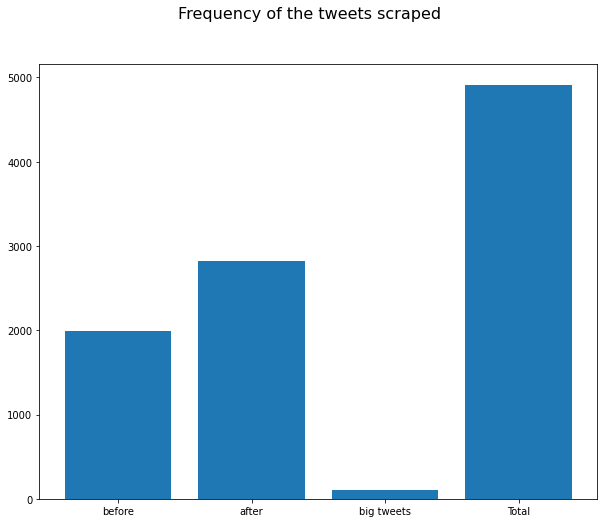

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
label = ["before","after", "big tweets", "Total"]
frequency = [sizeBefore, sizeAfter, sizeBig, totalTweets]
ax.bar(label, frequency)
fig.suptitle('Frequency of the tweets scraped', fontsize=16)
plt.show()

Apply sentiment analysis to all Tweets

In [ ]:
biggerTweets['polarity'] = biggerTweets['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity-0.3)
biggerTweets['subjectivity'] = biggerTweets['Tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity-0.3)
biggerTweets['Sentiment'] = biggerTweets['polarity'].apply(lambda x: evaluate(x))
biggerTweets

,Unnamed: 0,Username,Tweet,Likes,polarity,subjectivity,Sentiment
0,109,Greg Salazar,important note youtube 's ridiculous removal p...,184,-0.277778,0.388889,negative
1,167,𝕹𝖎𝖈𝖍𝖔𝖑𝖆𝖘 𝕯𝖊𝕺𝖗𝖎𝖔,made whole google doc channel getting dislike ...,181,-0.233333,-0.125000,negative
2,198,Linus LinusMediaGroup,empirical evidence 've seen negative comment b...,188,-0.200000,0.033333,negative
3,808,ducking,dislike,124,-0.300000,-0.300000,negative
4,857,Ace - D2 news n stuff,one days twitter add dislike button youtube ge...,222,-0.300000,-0.300000,negative
...,...,...,...,...,...,...,...
94,2716,BATUHAN CANSIN ÖZER,bring back dislike counter without youtube fil...,119,-0.300000,-0.300000,negative
95,2719,Gaurav Sahu,gt talks balance gt removes dislike numbers ggwp,129,-0.300000,-0.300000,negative
96,2728,JoltzDude139,'m fan youtube hiding dislikes videos viewers ...,1071,-0.768182,0.353030,negative
97,2764,YouTube,let 's celebrate indigenous futures consider l...,1986,-0.300000,-0.300000,negative


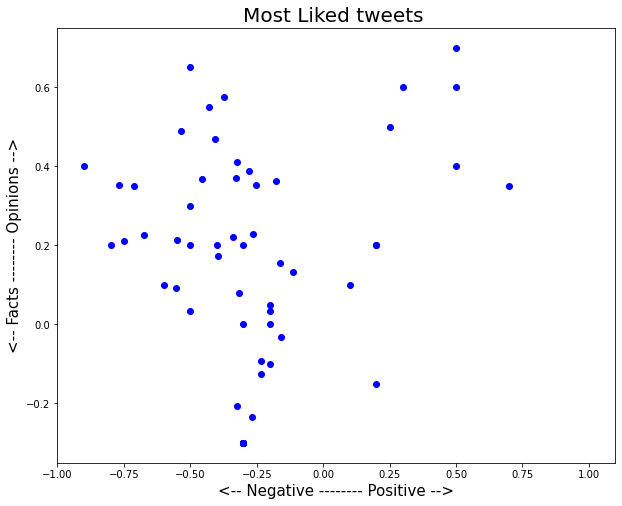

In [ ]:
plotDf = biggerTweets.loc[(biggerTweets['polarity'] > 0.1) | (biggerTweets['polarity'] < -0.1)]
plt.rcParams['figure.figsize'] = [10, 8]

for index, Tweet in enumerate(plotDf.index):
    x = plotDf.polarity.loc[Tweet]
    y = plotDf.subjectivity.loc[Tweet]
    plt.scatter(x, y, color='blue')
    plt.xlim(-1, 1.1) 
    
plt.title('Most Liked tweets ', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [ ]:
pd.set_option("display.max_colwidth", -1)
plotDf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Username,Tweet,Likes,polarity,subjectivity,Sentiment
0,109,Greg Salazar,important note youtube 's ridiculous removal public 'dislike counter channel owners still se…,184,-0.277778,0.388889,negative
1,167,𝕹𝖎𝖈𝖍𝖔𝖑𝖆𝖘 𝕯𝖊𝕺𝖗𝖎𝖔,made whole google doc channel getting dislike botted could refer back future and…,181,-0.233333,-0.125000,negative
2,198,Linus LinusMediaGroup,empirical evidence 've seen negative comment better uploader 's menta…,188,-0.200000,0.033333,negative
3,808,ducking,dislike,124,-0.300000,-0.300000,negative
4,857,Ace - D2 news n stuff,one days twitter add dislike button youtube get ratio 'd dislikes every singl…,222,-0.300000,-0.300000,negative
...,...,...,...,...,...,...,...
94,2716,BATUHAN CANSIN ÖZER,bring back dislike counter without youtube filling scammers videos easly ever,119,-0.300000,-0.300000,negative
95,2719,Gaurav Sahu,gt talks balance gt removes dislike numbers ggwp,129,-0.300000,-0.300000,negative
96,2728,JoltzDude139,'m fan youtube hiding dislikes videos viewers way make every video look positive videos need ratings n't mislead bad movie terrible video game etc,1071,-0.768182,0.353030,negative
97,2764,YouTube,let 's celebrate indigenous futures consider learn history unthanksgiving,1986,-0.300000,-0.300000,negative


In [ ]:
OldDf2['polarity'] = OldDf2['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
OldDf2['subjectivity'] = OldDf2['Tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
OldDf2['Sentiment'] = OldDf2['polarity'].apply(lambda x: evaluate(x))
OldDf2

,Username,Tweet,Date,Likes,polarity,subjectivity,Sentiment
0,Waikiki🌺,thinking starting youtube channel,2021-10-19,1,0.000000,0.100000,negative
1,𝚂𝚑𝚎𝚗 💫,ca n't lectures like informative youtube videos much attractive visuals plethora information ideas,2021-10-19,20,0.800000,1.000000,Positive
2,Krrazy JJ,juice honestly pass future youtube subscribers soon ... 2 mil away,2021-10-19,0,0.300000,0.512500,Positive
3,Alan Swanson,.AT_USER hey guys ’ gon na able watch show three weeks ’ every time try open youtube get blasted thousands eternal spoilers ’ even click anymore,2021-10-19,0,-0.033333,0.675000,negative
4,Splat,question youtube notify even uploaded video today,2021-10-19,0,0.000000,0.000000,negative
...,...,...,...,...,...,...,...
1988,RSN🐏,streaming feed ever stops click youtube channel link bio,2021-10-19,0,0.000000,0.000000,negative
1989,Xhep (reject donke return to Melira),saw someone complain youtube 80s 90s better people nowadays `` crybabies get offended everything '' humanity always crybabies get offended everything internet 's made easier notice,2021-10-19,0,0.500000,0.500000,Positive
1990,Arren Baker,launching new youtube channel monday 25th october moment put video featuring tom baker scene revenge cybermen amazingly one subscriber already put details channel later week,2021-10-19,17,0.245455,0.451515,Positive
1991,I R M I L A Y,want camera youtube everyday life reign whew grinning face sweatloudly crying face,2021-10-19,1,-0.200000,0.600000,negative


In [ ]:
OldDf2.Sentiment.value_counts()

negative    1117
Positive    876 
Name: Sentiment, dtype: int64

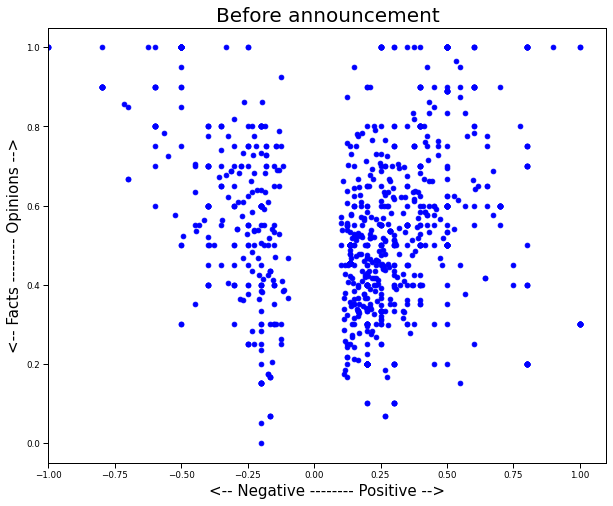

In [ ]:
plotDf = OldDf2.loc[(OldDf2['polarity'] > 0.1) | (OldDf2['polarity'] < -0.1)]
plt.rcParams['figure.figsize'] = [10, 8]

for index, Tweet in enumerate(plotDf.index):
  if index < 1000:
    x = plotDf.polarity.loc[Tweet]
    y = plotDf.subjectivity.loc[Tweet]
    plt.scatter(x, y, color='blue')
    plt.xlim(-1, 1.1) 
    
plt.title('Before announcement', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [ ]:
plotDf

,Username,Tweet,Date,Likes,polarity,subjectivity,Sentiment
1,𝚂𝚑𝚎𝚗 💫,ca n't lectures like informative youtube videos much attractive visuals plethora information ideas,2021-10-19,20,0.800000,1.000000,Positive
2,Krrazy JJ,juice honestly pass future youtube subscribers soon ... 2 mil away,2021-10-19,0,0.300000,0.512500,Positive
5,Jennifer is...kinda back for football season,tues get ready impeachmentfx 10 letting time get away us youtube husband talks french pop-pop first probably 5 times week makes admit loving well played darling well played,2021-10-19,0,0.262500,0.445833,Positive
8,Franky,go live youtube twitch instagram facebook kanna korner still need followers host space twitter tho ...,2021-10-19,2,0.136364,0.500000,Positive
9,ZackK,new youtube video idea get dog dna test spit,2021-10-19,0,0.136364,0.454545,Positive
...,...,...,...,...,...,...,...
1986,Mary,title fight season 1 team youtube mercedes domination title fight season 1 team 'm simulating right ferrari red bull fight merc literally nowhere ...,2021-10-19,1,0.142857,0.267857,Positive
1987,luna. 🎄,dont even need go youtube watch best song ever ’ mv shit engraved brain play head whenever want,2021-10-19,2,0.400000,0.550000,Positive
1989,Xhep (reject donke return to Melira),saw someone complain youtube 80s 90s better people nowadays `` crybabies get offended everything '' humanity always crybabies get offended everything internet 's made easier notice,2021-10-19,0,0.500000,0.500000,Positive
1990,Arren Baker,launching new youtube channel monday 25th october moment put video featuring tom baker scene revenge cybermen amazingly one subscriber already put details channel later week,2021-10-19,17,0.245455,0.451515,Positive


In [ ]:
finalDF['polarity'] = finalDF['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
finalDF['subjectivity'] = finalDF['Tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
finalDF['Sentiment'] = finalDF['polarity'].apply(lambda x: evaluate(x))
finalDF

,Unnamed: 0,Username,Tweet,Likes,polarity,subjectivity,Sentiment
0,0,Avior,think youtube removed dislike button youtube rewind 2021 coming soon… youtube yuh,0,0.0000,0.000000,negative
1,1,Will I Ain’t,rt yes dislike counter meeting youtube zero ducks given concerns ones shared our…,0,0.0000,0.000000,negative
2,2,𝙃𝙊𝙊𝙆𝙎𝙃𝙊𝙏,dislike video,0,0.0000,0.000000,negative
3,3,Franco Contreras,fucked ... dislike count necessary,0,-0.3000,0.850000,negative
4,4,Gully,could higher position like/dislike buttons,0,0.2500,0.500000,Positive
...,...,...,...,...,...,...,...
2818,2818,benboy,let 's make standard practice leave pinned comment videos acts dislike counter liking comment dislike,28,0.0000,0.000000,negative
2819,2819,Anthony,need dislike button see whether review video bad ’ tell might using method ’ ineffective fuck youtube making pointless changes nothing hopefully change mind,3,-0.4500,0.588889,negative
2820,2820,Virgin,never really pressed dislike much fucking disgrace youtube gotten rid fuck greedy fucking cunt bags n't care `` harassment '' `` bullying '' care money,1,-0.4250,0.600000,negative
2821,2821,john,pro ethiopiaunity youtube channels like hak ena sak dere news esat fana amc addis media mereja today andafta key tube mehal mesa .. never experienced dislike thumbs tplf supporters z past days.very unusual coordinated silence.AT_USER tokichaw mehalmeda,0,-0.1125,0.787500,negative


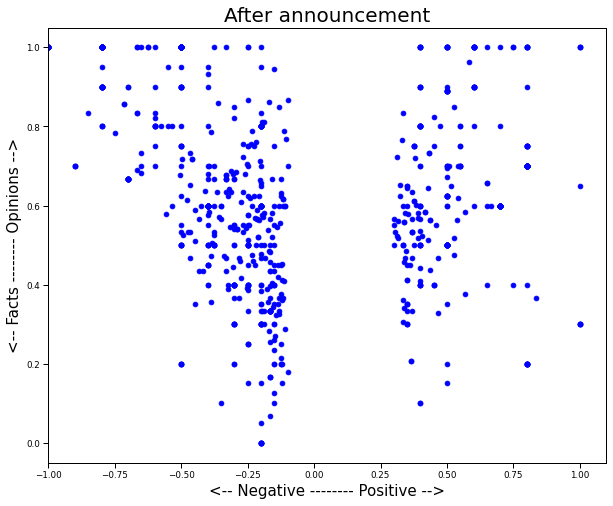

In [ ]:
plotDf = finalDF.loc[(finalDF['polarity'] > 0.3) | (finalDF['polarity'] < -0.1)]
plt.rcParams['figure.figsize'] = [10, 8]

for index, Tweet in enumerate(plotDf.index):
  if index < 1000:
    x = plotDf.polarity.loc[Tweet]
    y = plotDf.subjectivity.loc[Tweet]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, index, fontsize=10)
    plt.xlim(-1, 1.1) 
    
plt.title('After announcement', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [ ]:
a = finalDF.Sentiment.value_counts()
a.Positive

b = OldDf2.Sentiment.value_counts()

In [ ]:
b

negative    1117
Positive    876 
Name: Sentiment, dtype: int64

In [ ]:
ap = np.array([b.negative,b.Positive,a.negative,a.Positive])
ap

array([1117,  876, 2031,  792])

In [ ]:
dataf= pd.DataFrame(ap, columns = ['Value'])
dataf['class'] = ['Negative','Positive','Negative','Positive']
dataf['Time'] = ['Before','Before','After','After']
dataf

,Value,class,Time
0,1117,Negative,Before
1,876,Positive,Before
2,2031,Negative,After
3,792,Positive,After


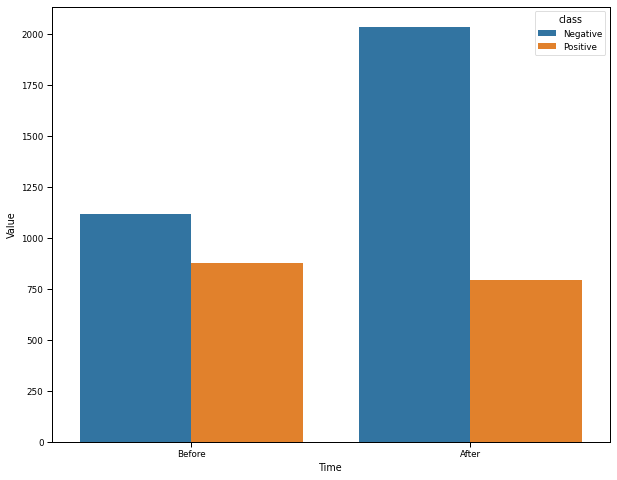

In [ ]:
sns.barplot(data = dataf
            ,x = 'Time'
            ,y = 'Value'
            ,hue = 'class'
            ,ci = None
            )

In [ ]:
#replace emoji

In [ ]:
oldTweet = OldDf2
newTweet = finalDF

In [ ]:
newTweet

,Unnamed: 0,Username,Tweet,Likes
0,0,Avior,I think YouTube removed the dislike button because YouTube rewind 2021 is coming soon… :o #YouTube #yuh,0
1,1,Will I Ain’t,RT @linusgsebastian: Yes I had the dislike counter meeting with YouTube.\n\nZero ducks were given about my concerns or the ones shared by our…,0
2,2,𝙃𝙊𝙊𝙆𝙎𝙃𝙊𝙏,@YouTube Dislike. Not because of the video,0
3,3,Franco Contreras,@YouTube you fucked up... The dislike count is necessary!,0
4,4,Gully,@YouTube could you higher the position of the like/dislike buttons again?,0
...,...,...,...,...
2818,2818,benboy,@YouTube @HenrieVIII @misterjjosephs Let's make it standard practice to leave a pinned comment on videos that acts as the dislike counter. Liking the comment = dislike,28
2819,2819,Anthony,@rickyberwick @TeamYouTube I need the dislike button so I can see whether a review or a how to video is bad. Now I can’t tell and might be using a method that’s ineffective. Fuck YouTube for just making pointless changes that do nothing. Hopefully they change their mind,3
2820,2820,Virgin,"I never really pressed dislike that much but its a fucking disgrace that youtube has gotten rid of it. Fuck you greedy fucking cunt bags @youtube you don't care about ""harassment"" or ""bullying"" all you care about is the money.",1
2821,2821,john,"Pro 🇪🇹unity YouTube channels like, Hak ena sak,Dere news,ESAT,Fana, AMC,Addis media,Mereja today, Andafta,Key Tube, mehal Mesa,.. never experienced any dislike 👎 from Tplf supporters I z past few days.Very unusual! A coordinated silence.@Abe_tokichaw @mamamesay #mehalmeda",0


In [ ]:
newTweet["Tweet"] = newTweet["Tweet"].apply(lambda x: emoji.demojize(x , delimiters=("", "")).replace("_", " "))

In [ ]:
oldTweet['Tweet'] = oldTweet['Tweet'].apply(clean_tweet)
newTweet['Tweet'] = newTweet['Tweet'].apply(clean_tweet)

In [ ]:
list(oldTweet['Tweet'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer( min_df=10, stop_words='english')
doc_term_matrix = count_vect.fit_transform(newTweet['Tweet'])

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd= TruncatedSVD(n_components=1)
lsa = svd.fit_transform(doc_term_matrix)
print(len(lsa))

2823


In [ ]:
encoding = pd.DataFrame(svd.components_, index=['topic1'], columns=count_vect.get_feature_names()).T
encoding

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,topic1
10,0.004576
2018,0.003529
2021,0.005260
ability,0.005282
able,0.008297
...,...
youtube,0.492264
youtubedislike,0.001696
youtuber,0.003429
youtubers,0.002965


In [ ]:

encoding.sort_values('topic1', ascending=False).head(50)

,topic1
dislike,0.745188
youtube,0.492264
button,0.301255
like,0.125085
count,0.118203
video,0.105036
removed,0.075549
bring,0.075392
removing,0.073136
videos,0.073100


In [ ]:
count_vect = CountVectorizer( min_df=10, stop_words='english')
doc_term_matrix = count_vect.fit_transform(oldTweet['Tweet'])

In [ ]:
svd= TruncatedSVD(n_components=1)
lsa = svd.fit_transform(doc_term_matrix)
print(len(lsa))

1993


In [ ]:
encoding = pd.DataFrame(svd.components_, index=['topic1'], columns=count_vect.get_feature_names()).T
encoding

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,topic1
10,0.017439
100,0.007279
11,0.004654
12,0.006995
1k,0.004954
...,...
years,0.014874
yes,0.005445
youtube,0.917137
youtuber,0.008017


In [ ]:

encoding.sort_values('topic1', ascending=False).head(50)

,topic1
youtube,0.917137
videos,0.126274
video,0.124454
like,0.113168
face,0.106552
watch,0.089011
watching,0.086784
channel,0.080642
tears,0.066024
new,0.061589


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

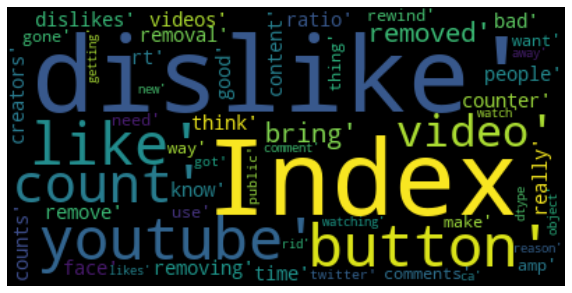

In [ ]:


# Create and generate a word cloud image:
text = encoding.sort_values('topic1', ascending=False).head(50).index
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

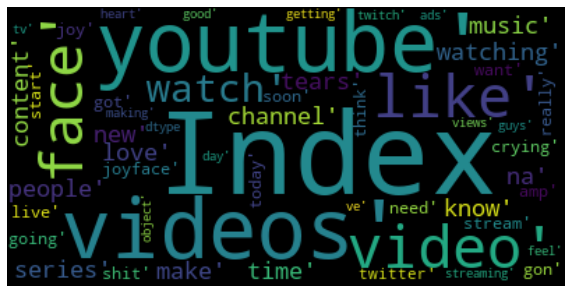

In [ ]:
# Create and generate a word cloud image:
text = encoding.sort_values('topic1', ascending=False).head(50).index
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()